In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

import tensorflow as tf
from tensorflow import keras

# 1. 데이터 불러오기

In [21]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 2. 입력 데이터 구축

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

target = 'medv'

x = data.drop(columns=target, axis=1)
x = data.drop(columns=['black'], axis=1)
y = data[target].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

In [23]:
# ELM 구현을 위해 필요한 함수 선언

def relu(x):
    return np.maximum(x, 0)

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

def hidden_nodes(X):
    G = np.dot(X, input_weights) # XW
    G = G + biases # XW + B
    H = sigmoid(G) # H = g(XW + B)
    return H

def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

# 3. ELM을 이용한 예측

In [25]:
# ELM 구현

input_size = x_train.shape[1]
hidden_size = 50

input_weights = np.random.normal(size=[input_size, hidden_size])
biases = np.random.normal(size=[hidden_size])

H = hidden_nodes(x_train)
H_t_H = np.dot(np.transpose(H), H)
inv_H_t_H = np.linalg.inv(H_t_H)
p_H = np.dot(inv_H_t_H, np.transpose(H))

output_weights = np.dot(p_H, y_train)

y_pred_tr = predict(x_train)
y_pred_te = predict(x_test)

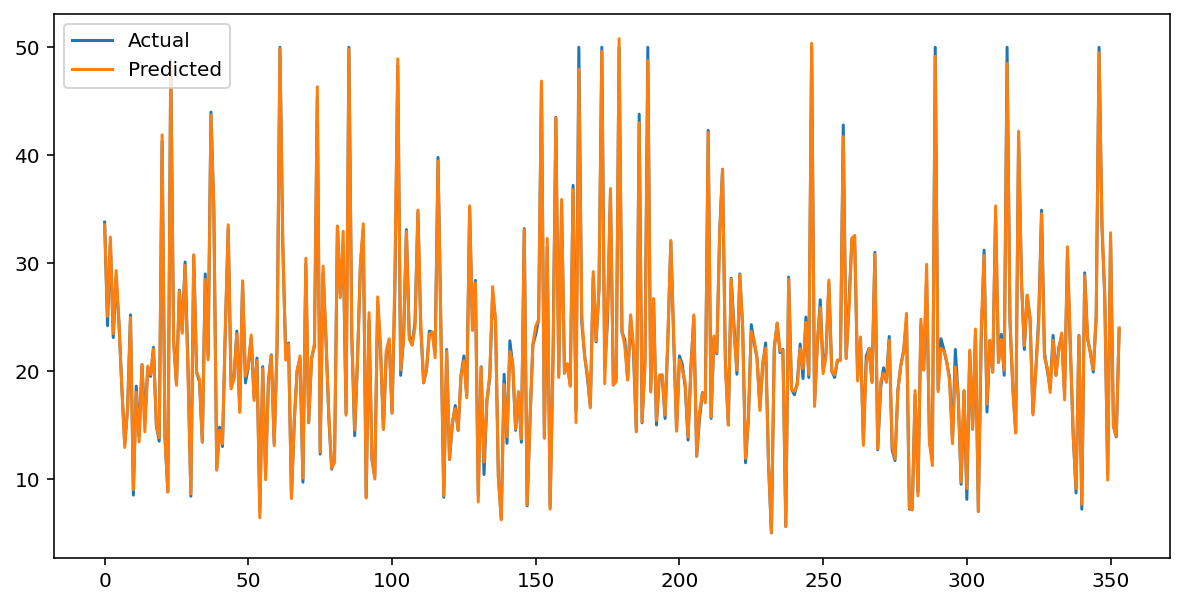

In [28]:
# Train 예측 결과
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Actual')
plt.plot(y_pred_tr, label='Predicted')
plt.legend()
plt.show()

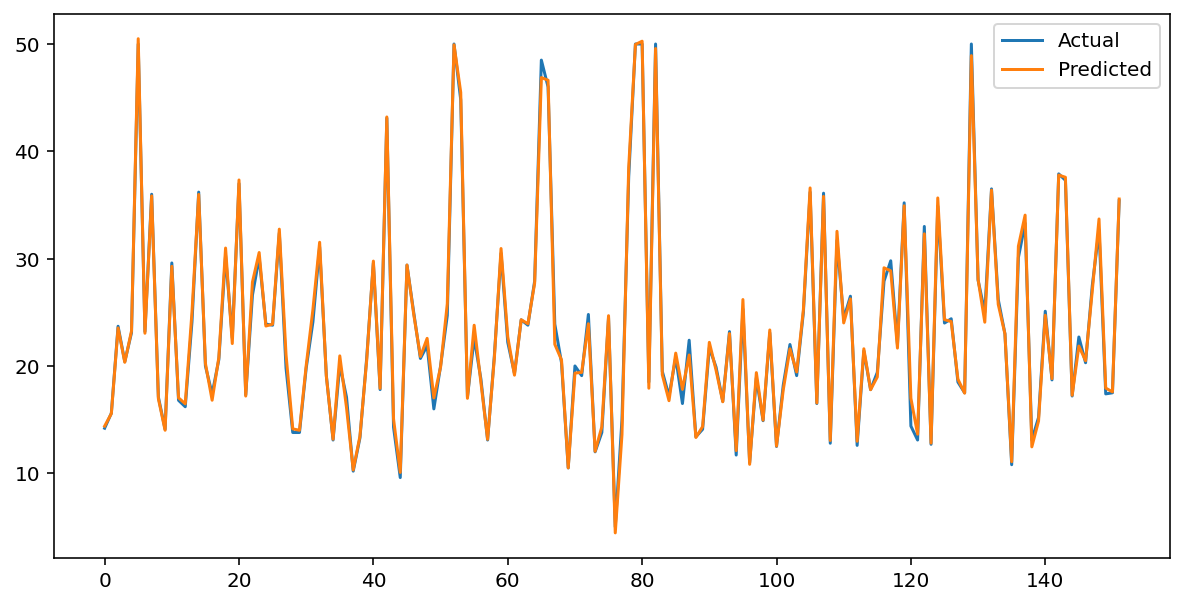

In [29]:
# Test 예측 결과
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_te, label='Predicted')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Train')
print('MAE : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE : ', mean_squared_error(y_train, y_pred_tr))
print('R2 : ', r2_score(y_train, y_pred_tr))
print('-'*50)
print('Test')
print('MAE : ', mean_absolute_error(y_test, y_pred_te))
print('MSE : ', mean_squared_error(y_test, y_pred_te))
print('R2 : ', r2_score(y_test, y_pred_te))

Train
MAE :  0.32034017703805134
MSE :  0.19796368103623527
R2 :  0.9975559749194393
--------------------------------------------------
Test
MAE :  0.4306987248571023
MSE :  0.35397888040277
R2 :  0.9961167598495373
